- Este proyecto tiene como objetivo analizar y comprobar diferentes hipotesis en una base de datos sobre las estadisticas de diferentes empresas de taxis en Estados Unidos.   

In [29]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
from scipy import stats as st

In [30]:
company = pd.read_csv('moved_project_sql_result_01.csv') 
neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
weather_duration = pd.read_csv('moved_project_sql_result_07.csv')
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- A mi solo se me abre el archivo asi, supongo por como se descargo la direccion es distinta.

In [31]:
print(company.head(10))
print(company['company_name'].duplicated().sum())
print(company['trips_amount'].value_counts())

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953
0
trips_amount
29       3
14       3
7        2
15       2
21       2
33       2
19558    1
230      1
210      1
147      1
146      1
127      1
39       1
37       1
36       1
31       1
25       1
27       1
11422    1
20       1
16       1
13       1
12       1
11       1
8        1
5        1
3        1
250      1
310      1
402      1
3175     1
10367    1
9888     1
9299     1
9181     1
8448     1
7701     1
7455     1
5953  

- Primero vemos que el df ya esta organizado de mayor a menor y que no tiene valores ausentes. En el caso de los duplicados en trips_amount, coinsidero que simplemente se trata de coincidencias normales.

In [32]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [33]:
print(neighborhoods.head(10))
print(neighborhoods['dropoff_location_name'].duplicated().sum())
print(neighborhoods['average_trips'].duplicated().sum())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667
0
0


- Podemos ver que este df tambien esta organizado de mayor a menor y que no tiene ningun dato duplicado o ausente. 

In [34]:
weather_duration['start_ts'] = pd.to_datetime(weather_duration['start_ts'], format='%Y-%m-%d %H:%M:%S')
weather_duration.info()
print(weather_duration.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


- Este df no tiene ningun valor nulo y los valores duplicados son totalmente normales. Lo unico que vi necesario fue convertir el tipo de dato de la columna start_ts a datetime dado que es una fecha y puede que necesitemos usar operaciones con este tipo de dato en el futuro.

<Axes: xlabel='company name', ylabel='trips amount'>

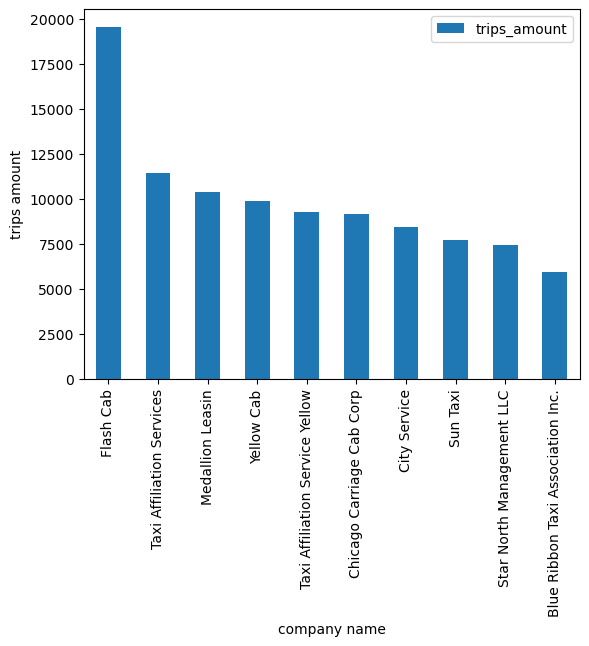

In [35]:
top_10_company = company.head(10) 
top_10_company.plot(kind='bar', x='company_name', y='trips_amount', rot=90, xlabel='company name', ylabel='trips amount')

- La compañia flash cap domina el mercado con una gran diferencia, sin embargo, sigue habiendo muchas compañias compitiendo despues de flash cap y la mayoria esta mas equilibrada. 

<Axes: xlabel='neighborhoods', ylabel='finished trips'>

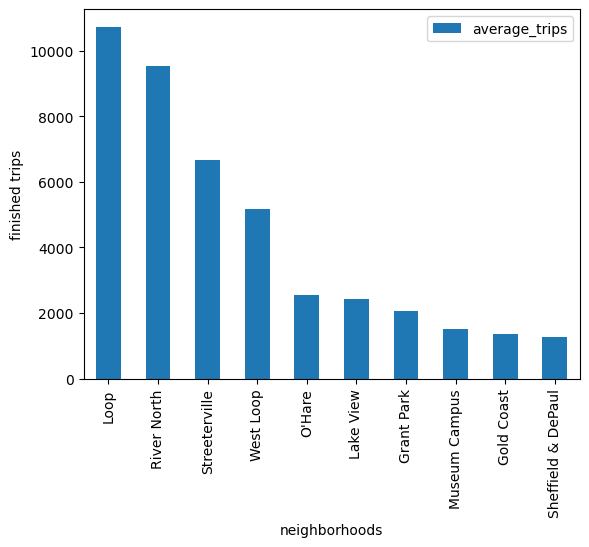

In [36]:
top_10_neighborhoods = neighborhoods.head(10)
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', ylabel='finished trips', xlabel='neighborhoods')

- En el ranking de los 10 barrios en los que mas viajes terminan tenemos 4 barrios principales, llegando a recibir mas de 10000, los seis restantes reciben alrededor de 2000.

- Para la prueba de hipotesis voy a usar el ttest_ind ya que este es el mas util cuando queremos comparar las medias de dos poblaciones. Para ello primero calculare las varianzas de cada poblacion para determinar si es necesario especificar el parametro equal_var, y para terminar calculare y comparare el valor p con alpha para ver que hacemos con las hipotesis nula y alternativa.

In [37]:
rainy_trips = weather_duration.query("start_ts.dt.dayofweek == 5 and weather_conditions == 'Bad'")
print(f'rainy_trips var: {rainy_trips['duration_seconds'].var()}, weather_duration var: {weather_duration['duration_seconds'].var()}')
alpha = 0.5
ttest_rainy_trips = st.ttest_ind(rainy_trips['duration_seconds'], weather_duration['duration_seconds'].mean())
if ttest_rainy_trips.pvalue < alpha:
    print('no hay suficiente evidencia para decir que la media de viajes es diferente en los dias lluviosos')
else:
    print('La media de viajes es diferente los dias lluviosos')

rainy_trips var: 520294.08600248274, weather_duration var: 592070.4235009099
La media de viajes es diferente los dias lluviosos


- Coinsidero que no es necesario especificar el equal_var ya que las varianzas no son tan diferentes. 
- Por los resultados del test podemos concluir que la media de viajes depende del clima.